# Default of credit card clients

ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)

In [5]:
!pip install xlrd


     ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
     ------------ ------------------------- 30.7/96.5 kB 325.1 kB/s eta 0:00:01
     ---------------- --------------------- 41.0/96.5 kB 281.8 kB/s eta 0:00:01
     ------------------------------------ - 92.2/96.5 kB 581.0 kB/s eta 0:00:01
     -------------------------------------- 96.5/96.5 kB 501.7 kB/s eta 0:00:00


In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import numpy as np

C:\Users\user\AppData\Local\Temp\ipykernel_20048\3465445878.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# objectives
Our goal is to use historical data to calculate the likelihood of a loan applicant failing to repay the loan.

# Data Collection
https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

In [2]:
df=pd.read_excel('default of credit card clients.xls')
df.shape

(30001, 25)

In [3]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
df.columns=df.iloc[0]
df=df[1:]

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.isnull().sum()

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [8]:
df.describe().T

,count,unique,top,freq
0,,,,
ID,30000,30000,1,1
LIMIT_BAL,30000,81,50000,3365
SEX,30000,2,2,18112
EDUCATION,30000,7,2,14030
MARRIAGE,30000,4,2,15964
AGE,30000,56,29,1605
PAY_0,30000,11,0,14737
PAY_2,30000,11,0,15730
PAY_3,30000,11,0,15764


In [9]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [10]:
num_col=['ID','LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
df[num_col]=df[num_col].apply(pd.to_numeric,downcast='float')
df[df.columns.difference(num_col)]=df[df.columns.difference(num_col)].astype('int64')

In [11]:
df = df.rename(columns={'PAY_0': 'PAY_1'})

In [12]:
categorical_features=df.columns.difference(num_col)

In [13]:
df[categorical_features].describe()

,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,SEX,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.853133,1.551867,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,1.603733,0.221200
std,0.790349,0.521970,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,0.489129,0.415062
min,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,1.000000,0.000000
25%,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
max,6.000000,3.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000


In [14]:
df.MARRIAGE.unique()

array([1, 2, 3, 0], dtype=int64)

In [15]:
df.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [16]:
# Fixing marriage
df.MARRIAGE= df.MARRIAGE.apply(lambda x: 3 if x == 0 else x)

# Fixing education
df.EDUCATION= df.EDUCATION.apply(lambda x: 4 if x in [0, 5, 6] else x)

df[categorical_features].describe()

,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,SEX,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.842267,1.557267,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,1.603733,0.221200
std,0.744494,0.521405,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,0.489129,0.415062
min,1.000000,1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,1.000000,0.000000
25%,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
max,4.000000,3.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000


In [17]:
df[num_col].describe()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.328125,35.485500,51223.335938,49179.078125,4.701315e+04,43262.949219,40311.398438,38871.761719,5663.580566,5.921164e+03,5225.681641,4826.076660,4799.387695,5215.502441
std,8660.398438,129747.664062,9.217904,73635.859375,71173.773438,6.934938e+04,64332.855469,60797.156250,59554.105469,16563.281250,2.304087e+04,17606.960938,15666.160156,15278.305664,17777.466797
min,1.000000,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.000000,296.000000,252.500000,117.750000
50%,15000.500000,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,22500.250000,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.000000,4013.250000,4031.500000,4000.000000
max,30000.000000,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


# Exploratory Data Analysis (EDA)

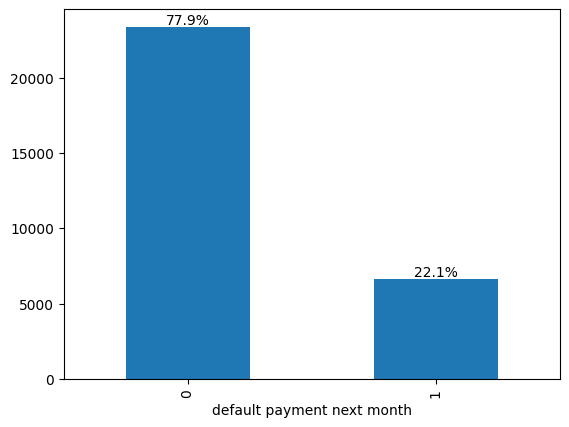

In [18]:
#print(df['default payment next month'].value_counts()/ len(df)*100 )
#df['default payment next month'].value_counts().plot(kind='bar')
# Plot a bar graph with percentage labels
ax = df['default payment next month'].value_counts().plot.bar()
for p in ax.patches:
    # Calculate the percentage of the total height
    percentage = '{:.1f}%'.format(100 * p.get_height() / df['default payment next month'].value_counts().sum().sum())
    # Display the percentage above each bar
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()

The data has not a large unbalance with respect of the target value (default payment next month).

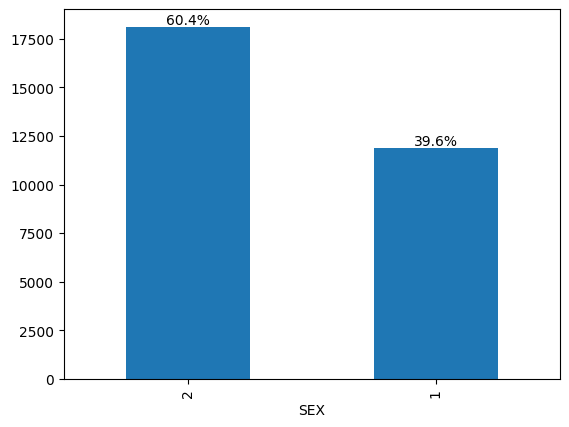

In [19]:
# Plot a bar graph with percentage labels
ax = df['SEX'].value_counts().plot.bar()
for p in ax.patches:
    # Calculate the percentage of the total height
    percentage = '{:.1f}%'.format(100 * p.get_height() / df['SEX'].value_counts().sum().sum())
    # Display the percentage above each bar
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()

In [20]:
pd.crosstab(index=df['SEX'], columns=df['default payment next month'], normalize='index', margins=True) * 100
#).plot(kind='bar',stacked=True)

default payment next month,0,1
SEX,,
1,75.832773,24.167227
2,79.223719,20.776281
All,77.880000,22.120000


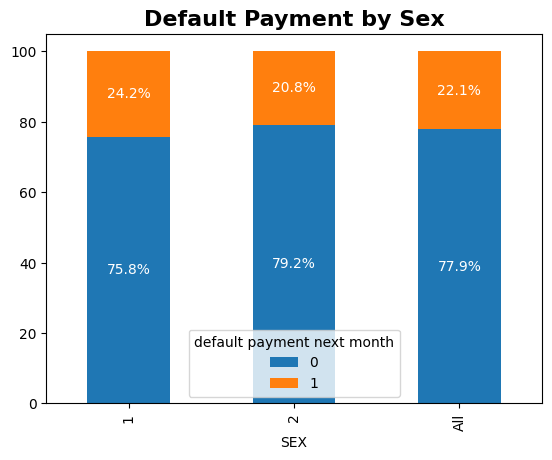

In [21]:
ct = pd.crosstab(index=df['SEX'], columns=df['default payment next month'], normalize='index', margins=True) * 100
ax = ct.plot(kind='bar', stacked=True)

# Add labels to each bar
for p in ax.patches:
    # Get the height and width of the bar
    h = p.get_height()
    w = p.get_width()
    
    # Get the x and y coordinates of the bar
    x = p.get_x()
    y = p.get_y()
    
    # Format the label as a percentage with one decimal place
    label = f"{h:.1f}%"
    
    # Adjust the position of the label to be in the center of the bar
    x_adj = x + w / 2
    y_adj = y + h / 2
    
    # Annotate the bar with the label
    ax.text(x_adj, y_adj, label, ha="center", va="center", color="white")

# Add title to the plot
plt.title('Default Payment by Sex', fontsize=16, fontweight='bold', color='black')
plt.show()

 We can thus conclude that men are more likely to default than women.

In [24]:
ct=pd.crosstab(index=df['EDUCATION'], columns=df['default payment next month'], normalize='index', margins=True) * 100
print(ct)

default payment next month          0          1
EDUCATION                                       
1                           80.765234  19.234766
2                           76.265146  23.734854
3                           74.842384  25.157616
4                           92.948718   7.051282
All                         77.880000  22.120000


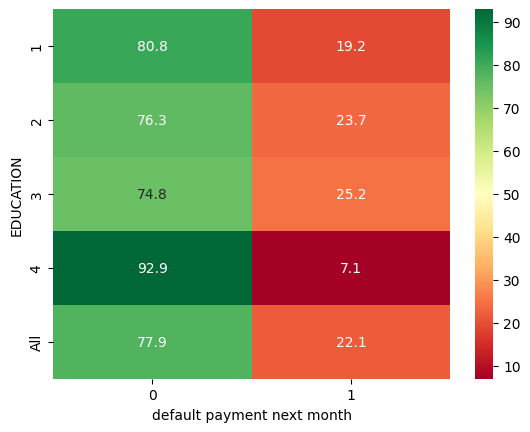

In [25]:
sns.heatmap(data=ct, annot=True, cmap='RdYlGn', fmt='.1f')
plt.show()

Persons that went to university and high school are both more likely to default than other categories.

AGE
(21.0, 25.0]    26.761304
(25.0, 35.0]    19.825321
(35.0, 50.0]    22.541659
(50.0, 65.0]    25.377920
(65.0, 79.0]    26.744186
All             22.122741
Name: 1, dtype: float64


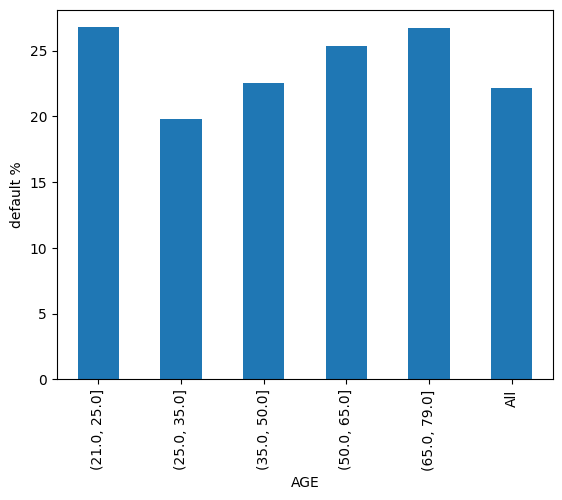

In [26]:
age_bins = [df['AGE'].min(), 25, 35, 50, 65, df['AGE'].max()]

# Create the crosstab
ct = pd.crosstab(index=pd.cut(df['AGE'], age_bins), columns=df['default payment next month'], normalize='index', margins=True) * 100
# Print the percentage of default payment for the value 1
print(ct[1])

# Plot the bar chart
ct[1].plot(kind='bar', ylabel='default %')

plt.show()

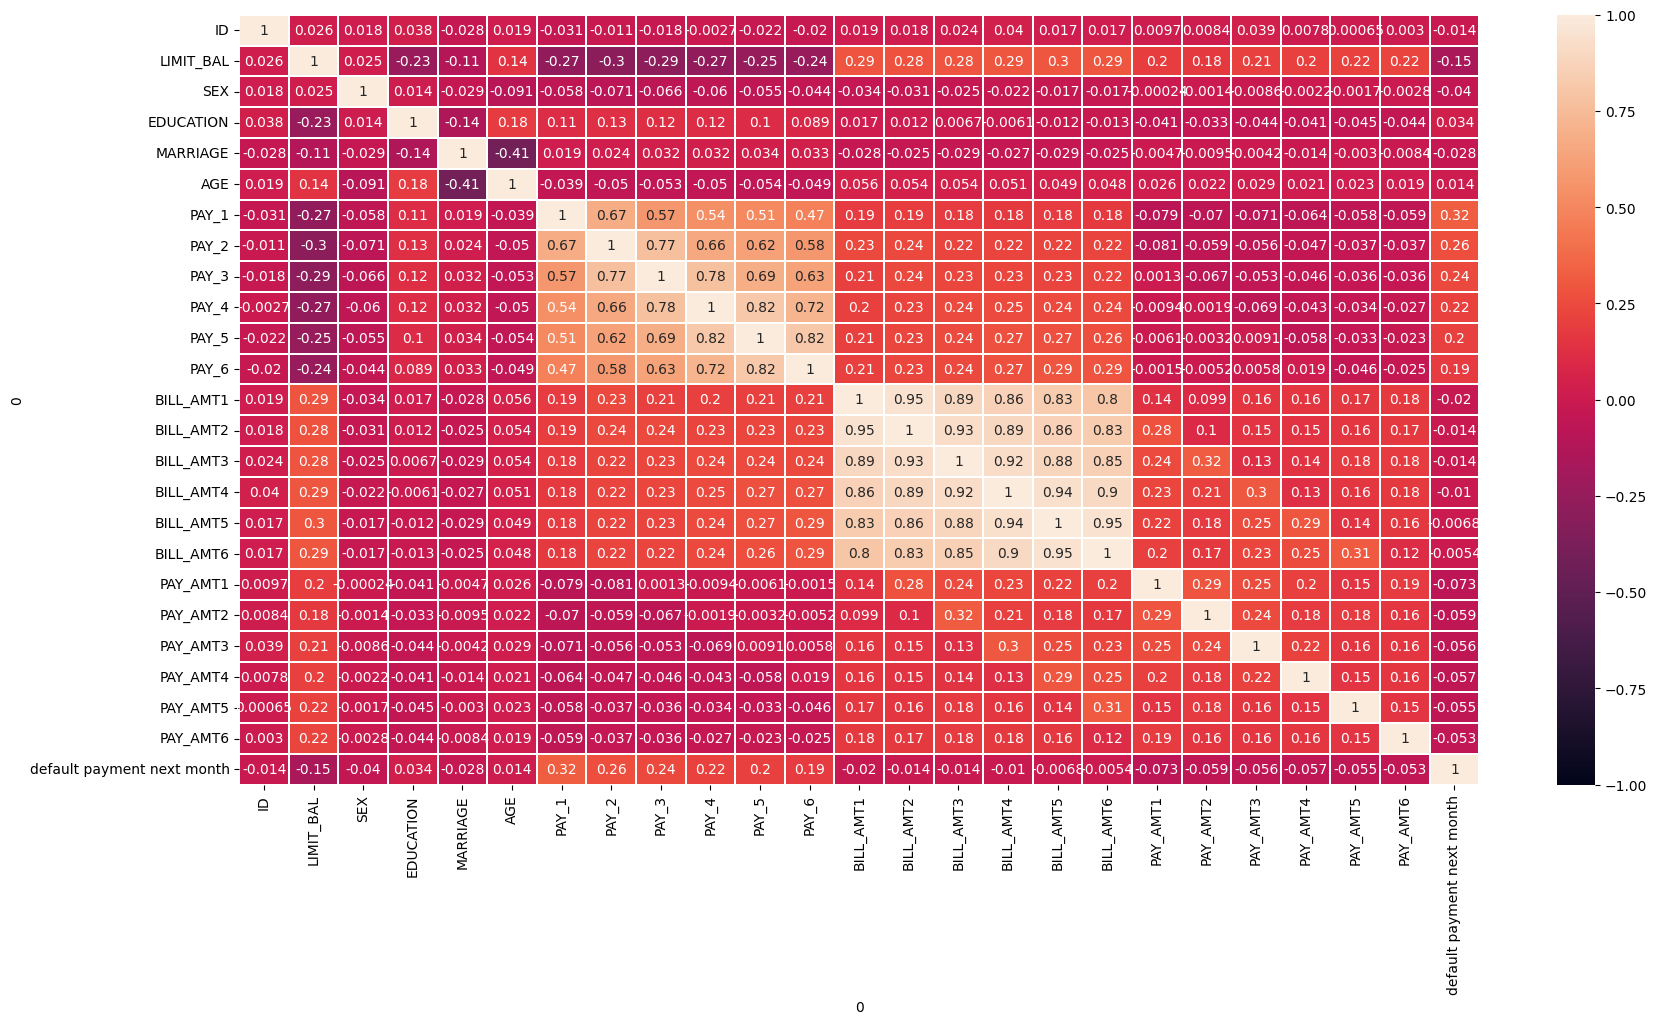

In [27]:
plt.figure(figsize = (20,10))
corr=df.corr()
#sns.heatmap(corr,annot=True,cmap="coolwarm")
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1,annot=True)
plt.show()

There are no correlations between amounts of previous payments for April-Sept 2005.
Correlation is decreasing with distance between months. Lowest correlations are between Sept-April.
Correlation is decreasing with distance between months. Lowest correlations are between Sept-April.

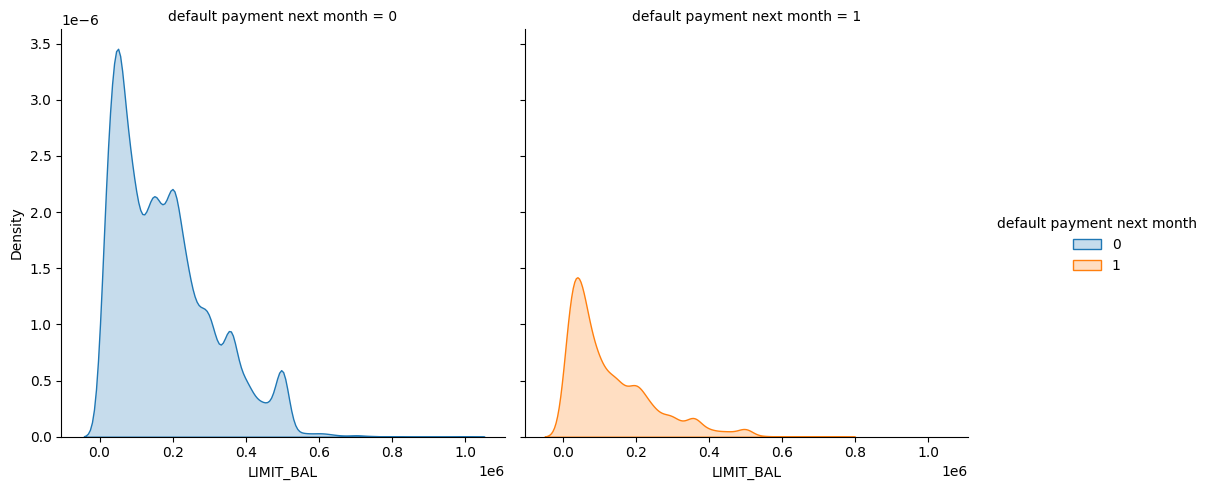

In [28]:
sns.displot(df, x="LIMIT_BAL", hue="default payment next month", col="default payment next month", kind="kde", fill=True)
plt.show()

Most of defaults are for credit limits 0-100,000 (and density for this interval is larger for defaults than for non-defaults). Larger defaults number are for the amounts of 50,000, 20,000 and 30,000.

A histogram can show the distribution of the credit limit balance for each sex, and you can use different colors or transparency to overlay the two histograms. You can also use the bins parameter to adjust the number of intervals in the histogram

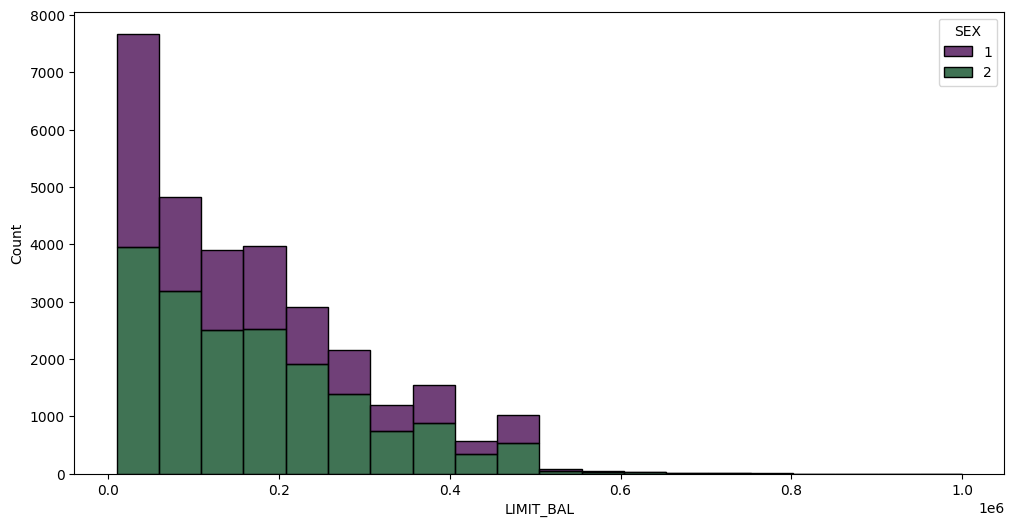

In [29]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(data=df, x="LIMIT_BAL", hue="SEX", multiple="stack", palette="PRGn", bins=20, ax=ax)
plt.show()


Most of defaults are for credit limits 0-100,000 (and density for this interval is larger for defaults than for non-defaults). Larger defaults number are for the amounts of 50,000, 20,000 and 30,000.

A violin plot can show the density of the credit limit balance for each sex, and you can use the split parameter to compare the two distributions side by side. You can also use the inner parameter to show the quartiles or individual observations inside the violin

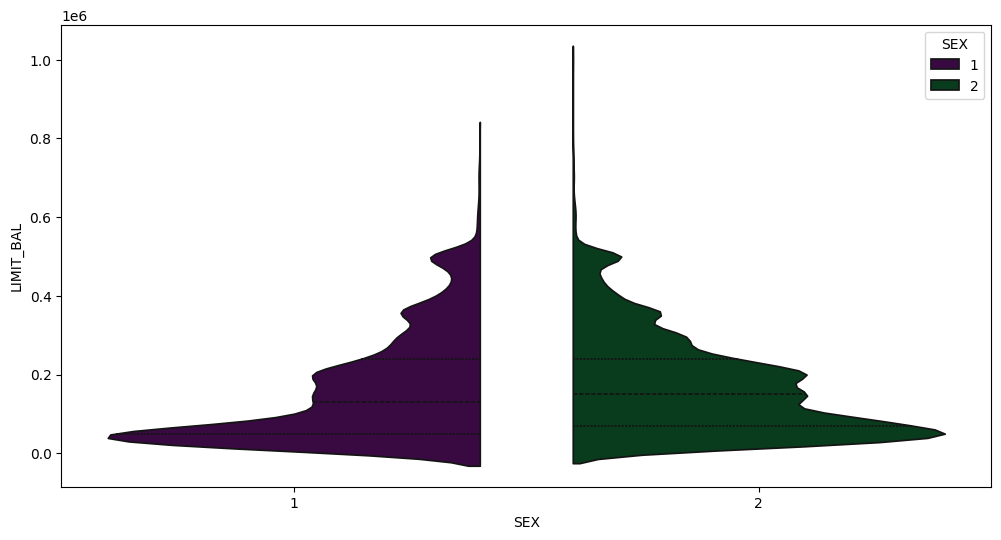

In [30]:
fig, ax = plt.subplots(figsize=(12,6))
sns.violinplot(data=df, x="SEX", y="LIMIT_BAL", hue="SEX", split=True, palette="PRGn", inner="quartile", ax=ax)
plt.show()


The limit credit amount is quite balanced between sexes. The males have a slightly smaller Q2 and larger Q3 and Q4 and a lower mean

In [33]:
import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [39]:
target = 'default payment next month'
predictors = [  'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [40]:
VALID_SIZE=0.3
RANDOM_STATE=7
NO_JOBS = 4
RFC_METRIC='gini'
NUM_ESTIMATORS=100


In [41]:
train_df, test_df = train_test_split(df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

In [42]:
clf = RandomForestClassifier(n_jobs= NO_JOBS, 
                             random_state= RANDOM_STATE,
                             criterion= RFC_METRIC,
                             n_estimators= NUM_ESTIMATORS,
                             verbose=False)

In [43]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=7, verbose=False)

In [44]:
preds = clf.predict(test_df[predictors])

In [45]:
roc_auc_score(test_df[target].values, preds)

0.6547080078813985

C:\Users\user\AppData\Local\Temp\ipykernel_20048\1428594667.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


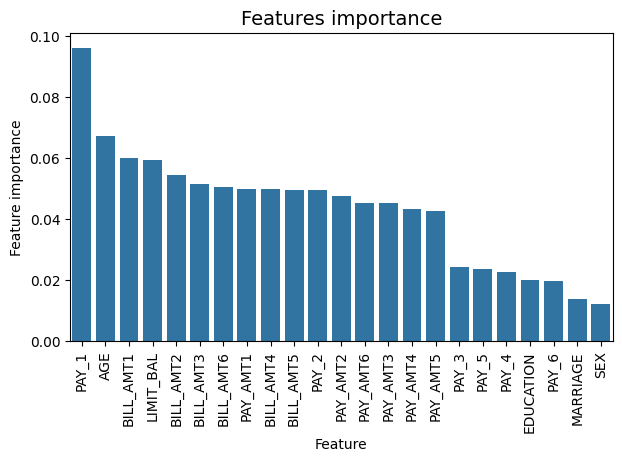

In [46]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [47]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_df[target].values, preds))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7019
           1       0.65      0.37      0.47      1981

    accuracy                           0.82      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [48]:
cm=confusion_matrix(test_df[target].values, preds)

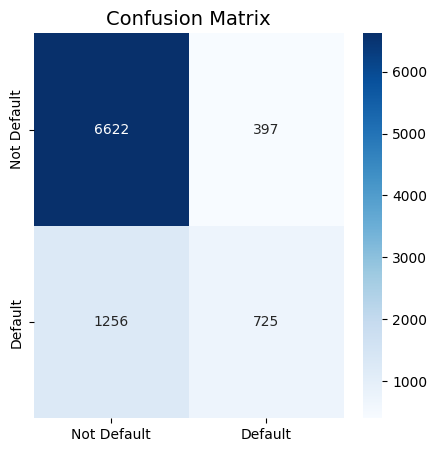

In [49]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,fmt='d'
            , cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [88]:
df.iloc[2:3,0:24].values.reshape(1,-1)

array([[3.0000e+00, 9.0000e+04, 2.0000e+00, 2.0000e+00, 2.0000e+00,
        3.4000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.9239e+04, 1.4027e+04, 1.3559e+04,
        1.4331e+04, 1.4948e+04, 1.5549e+04, 1.5180e+03, 1.5000e+03,
        1.0000e+03, 1.0000e+03, 1.0000e+03, 5.0000e+03]])

In [95]:
df.iloc[2:3,0:24]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
3,3.0,90000.0,2,2,2,34.0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0


In [131]:
X=df[predictors]
y=df[target]

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)

In [133]:

# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score



In [134]:
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)

In [135]:
X_test = X_scaler.transform(X_test)

In [136]:
import pickle
pickle.dump(X_scaler,open('scaling.pkl','wb'))

In [137]:
VALID_SIZE=0.3
RANDOM_STATE=7
NO_JOBS = 4
RFC_METRIC='gini'
NUM_ESTIMATORS=100


In [138]:
clf = RandomForestClassifier(n_jobs= NO_JOBS, 
                             random_state= RANDOM_STATE,
                             criterion= RFC_METRIC,
                             n_estimators= NUM_ESTIMATORS,
                             verbose=False)

In [139]:
cv = KFold(n_splits=(4 - 1))
scores = cross_val_score(clf, X_train, y_train, cv=cv)

# Define the scaler and the classifier
scaler = StandardScaler()


# Create the pipeline object
pipeline = Pipeline([
    ('transformer', scaler), # apply standardization
    ('estimator', clf) # train the classifier
])

# Define the number of folds for cross-validation
folds = 4

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1/folds), random_state=7, stratify=y)

# Apply cross-validation to the pipeline
cv = KFold(n_splits=(folds - 1))
scores = cross_val_score(pipeline, X_train, y_train, cv=cv)



In [140]:
# Print the scores
print(scores)

[0.81528571 0.82157143 0.81285714]


In [143]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=4, random_state=7, verbose=False)

In [144]:
y_pred = clf.predict(X_test)

In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7019
           1       0.65      0.36      0.47      1981

    accuracy                           0.82      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [146]:
import pickle
pickle.dump(clf,open('ccmodel.pkl','wb'))

In [147]:
pickle_model=pickle.load(open('ccmodel.pkl','rb'))

In [148]:
## Prediction
pickle_model.predict(X_scaler.transform(X.iloc[0].values.reshape(1,-1)))

c:\Users\user\.conda\envs\cc\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)